In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import numpy as np

In [2]:
housing_df = pd.read_csv(r'C:\Users\Ashish\Desktop\machine learning\HousingData.csv')

In [3]:
housing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
housing_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
housing_df = housing_df.fillna(housing_df.mean())

In [7]:
housing_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
X_features = list(housing_df.columns)
X_features.remove('MEDV')
X_features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [9]:
X = housing_df[X_features]
Y= housing_df['MEDV']

In [10]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3,  random_state= 42)

In [11]:
linreg = LinearRegression()
linreg.fit(train_X, train_Y)

LinearRegression()

In [12]:
y_pred = linreg.predict(test_X)

In [13]:
linreg.coef_

array([-1.28803064e-01,  3.19126435e-02, -1.08045993e-02,  3.68918767e+00,
       -1.39638728e+01,  4.41848624e+00, -2.61056369e-02, -1.43275398e+00,
        1.96898186e-01, -7.21929326e-03, -8.86286026e-01,  1.17656210e-02,
       -4.73116343e-01])

In [14]:
column_coef_df = pd.DataFrame(dict(columns = X_features, coef = linreg.coef_))

In [15]:
sorted_coef_vals = column_coef_df.sort_values('coef', ascending= False)

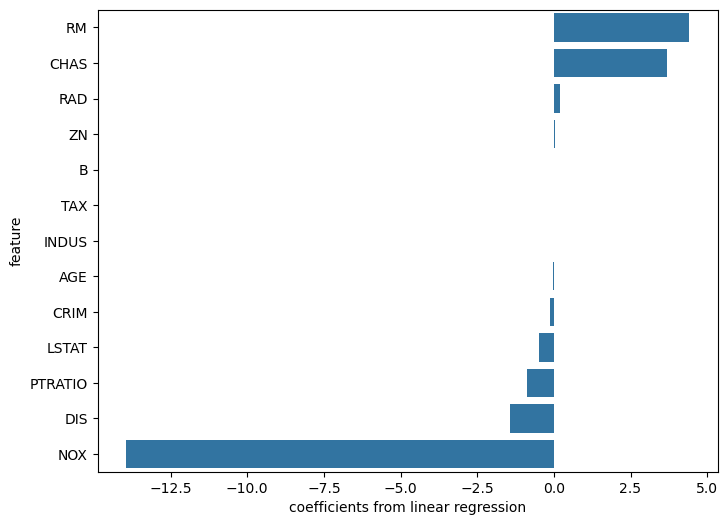

In [16]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'coef', y= 'columns', data = sorted_coef_vals)
plt.xlabel("coefficients from linear regression")
plt.ylabel("feature")
plt.show()

In [17]:
from sklearn import metrics

In [18]:
def get_train_test_rmse(model):
    # predicting on train dataset
    Y_pred_train = model.predict(train_X)
    rmse_train = round(np.sqrt(metrics.mean_squared_error(train_Y, Y_pred_train)), 3)
    
    # predicting on test dataset
    Y_test_pred = model.predict(test_X)
    rmse_test = round(np.sqrt(metrics.mean_squared_error(test_Y, Y_test_pred)),3)
    print("train: ", rmse_train, "test: ", rmse_test)

In [19]:
get_train_test_rmse(linreg)

train:  4.85 test:  4.671


In [20]:
from sklearn.linear_model import Ridge

In [21]:
ridge = Ridge(alpha= 1, max_iter = 300)
ridge.fit(train_X , train_Y)

Ridge(alpha=1, max_iter=300)

In [22]:
get_train_test_rmse(ridge)

train:  4.865 test:  4.723


In [23]:
ridge = Ridge(alpha= 2, max_iter = 200)
ridge.fit(train_X , train_Y)

Ridge(alpha=2, max_iter=200)

In [24]:
get_train_test_rmse(ridge)

train:  4.877 test:  4.746


In [25]:
from sklearn.linear_model import Lasso

In [26]:
lasso = Lasso(alpha= 0.01, max_iter= 200)
lasso.fit(train_X, train_Y)

Lasso(alpha=0.01, max_iter=200)

In [27]:
get_train_test_rmse(lasso)

train:  4.854 test:  4.691


In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rf = RandomForestRegressor(n_estimators= 200, random_state= 42)
rf.fit(train_X, train_Y)

RandomForestRegressor(n_estimators=200, random_state=42)

In [30]:
get_train_test_rmse(rf)

train:  1.594 test:  3.136


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
tuned_perameter = {"n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10]}
grid_search = GridSearchCV(RandomForestRegressor(), tuned_perameter, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_search.fit(train_X, train_Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [33]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}


In [34]:
rf1 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf1.fit(train_X, train_Y)

RandomForestRegressor(max_depth=10, random_state=42)

In [35]:
get_train_test_rmse(rf1)

train:  1.746 test:  3.165


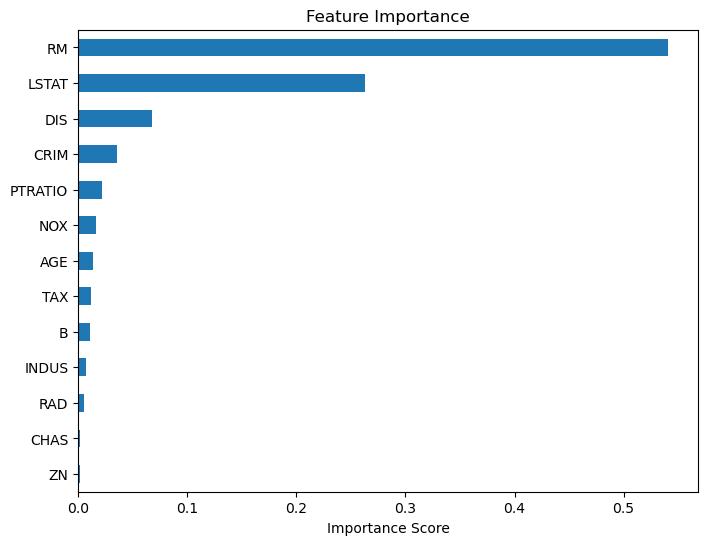

In [36]:
feature_importance = pd.Series(rf1.feature_importances_, index= train_X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(8, 6), title="Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [37]:
significant_variables = ['CRIM','RM','DIS','PTRATIO','LSTAT']

In [38]:
train_X = train_X[significant_variables]
test_X = test_X[train_X.columns] 

In [39]:
rf2 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf2.fit(train_X, train_Y)

RandomForestRegressor(max_depth=10, random_state=42)

In [40]:
get_train_test_rmse(rf2)

train:  1.792 test:  3.494


In [41]:
lasso = Lasso(alpha= 0.01, max_iter= 200)
lasso.fit(train_X, train_Y)

Lasso(alpha=0.01, max_iter=200)